In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Definition of the model

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, gamma,beta1,beta2,t_tresh=22):
    S,I,R = y

    if t<=t_tresh:
        B=beta1
    elif t>t_tresh:
        B=beta1*np.exp(-(t-t_tresh)/beta2)
    #elif t>1000:
    #    B=0.2*np.exp(-(t-1000)/beta2)
    
    dSdt = -(B*I/N)*S 
    dIdt = (B*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

### Integration of the differential equations

In [3]:
def time_evo(N,beta1,beta2,gamma,death_rate,t_tresh=22,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,gamma,beta1,beta2,t_tresh))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,(1-death_rate/100)*R,R*death_rate/100)

### Show the result

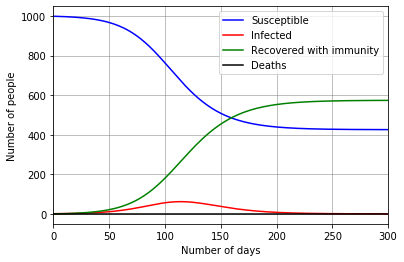

In [4]:
fin_result=time_evo(1000,0.15,10000,0.1,0)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered with immunity')
plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend()
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,300)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

#print(s_vec+i_vec+r_vec+m_vec)

### Load italian data

In [2]:
#nomiregioni=['Abruzzo', 'Basilicata', 'P.A. Bolzano', 'Calabria', 'Campania',
   # 'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
   #    'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
   #    'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
   #    'Veneto']

nomiregioni=['Abruzzo', 'Basilicata', 'Calabria', 'Campania',
       'Emilia Romagna', 'Friuli Venezia Giulia', 'Lazio', 'Liguria',
       'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna',
       'Sicilia', 'Toscana', 'P.A. Trento', 'Umbria', "Valle d'Aosta",
       'Veneto']

len(nomiregioni)

20

In [6]:
def esponenziale(t,t0,a):
    return a**(t-t0)

def lineare(t,q,m):
    return m+q*(t-50)

In [2]:
datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
mask = datatot['denominazione_regione']=='Molise'
data =datatot.loc[mask,:]
xdata=pd.to_numeric(range(data.shape[0]))
ydata=data['totale_casi']
ydata_death=data['deceduti']
ydata_rec=data['dimessi_guariti']

print(data.iloc[-1,:])

yinfected=np.array(ydata-ydata_death-ydata_rec)

data                          2020-05-27T17:00:00
stato                                         ITA
codice_regione                                 14
denominazione_regione                      Molise
lat                                       41.5577
long                                      14.6592
ricoverati_con_sintomi                          3
terapia_intensiva                               2
totale_ospedalizzati                            5
isolamento_domiciliare                        161
totale_positivi                               166
variazione_totale_positivi                     -8
nuovi_positivi                                  2
dimessi_guariti                               246
deceduti                                       22
totale_casi                                   434
tamponi                                     13629
casi_testati                                13087
note_it                                       NaN
note_en                                       NaN


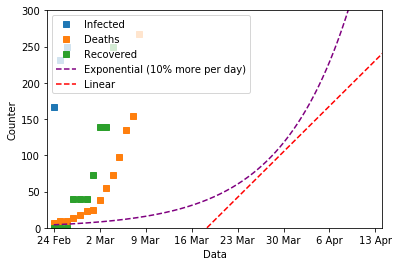

In [7]:
xgrid=np.arange(0,60,0.1)

plt.plot(xdata,yinfected,linestyle='None',label='Infected',marker='s')
plt.plot(xdata,ydata_death,linestyle='None',label='Deaths',marker='s')
plt.plot(xdata,ydata_rec,linestyle='None',label='Recovered',marker='s')
plt.plot(xgrid,esponenziale(xgrid,-15,1.1),label='Exponential (10% more per day)',color='purple',linestyle='--')
plt.plot(xgrid,lineare(xgrid,9,240),label='Linear',color='red',linestyle='--')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Counter')
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr'])
plt.ylim(0,300)
plt.xlim(-1,50)
plt.legend(loc=2)
plt.savefig('output/Data only_MOLISE.png',dpi=300)
plt.show()

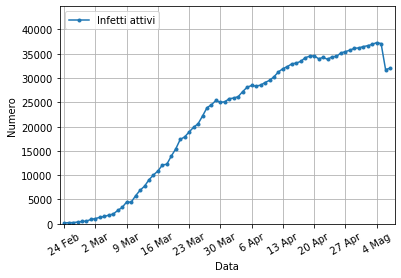

In [5]:
xgrid=np.arange(0,60,0.1)

#plt.figure(figsize=(9,7))
plt.plot(xdata,yinfected,label='Infetti attivi',marker='.')
#plt.plot(xdata,ydata_death,linestyle='None',label='Deaths',marker='s')
#plt.plot(xdata,ydata_rec,linestyle='None',label='Recovered',marker='s')
#plt.plot(xgrid,esponenziale(xgrid,-15,1.1),label='Exponential (10% more per day)',color='purple',linestyle='--')
#plt.plot(xgrid,lineare(xgrid,9,240),label='Linear',color='red',linestyle='--')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(0,80,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag'],rotation=30)
plt.ylim(0,yinfected.max()*1.2)
plt.xlim(-1,74)
plt.legend(loc=2)
plt.grid()
plt.savefig('output/Data only_MOLISE_line.png',dpi=300)
plt.show()

In [10]:
print('massimo ',yinfected.max())
print('attuali ',yinfected[-1])
print('calo ',(yinfected[-1]-yinfected.max())/yinfected.max()*100,'%')

massimo  15719
attuali  15323
calo  -2.5192442267319803 %


### modello SIR per il Molise

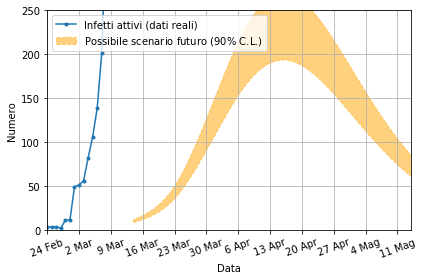

In [11]:
fin_result=time_evo(300000,0.26,24,0.1,0,t_tresh=10,I0=10)
t=fin_result[0]
i_vec=fin_result[2]

plt.plot(xdata,yinfected,label='Infetti attivi (dati reali)',marker='.')
plt.fill_between(t+19,i_vec*1.165,i_vec*(1-0.165),label='Possibile scenario futuro ($90$% C.L.)',linestyle='--',alpha=0.5,color='orange')
#plt.plot(t2+19,i_vec2,label='Previsione pessimistica',linestyle='--',alpha=0.8)
#plt.plot(xdata,ydata_death,linestyle='None',label='Deaths',marker='s')
#plt.plot(xdata,ydata_rec,linestyle='None',label='Recovered',marker='s')
#plt.plot(xgrid,esponenziale(xgrid,-15,1.1),label='Exponential (10% more per day)',color='purple',linestyle='--')
#plt.plot(xgrid,lineare(xgrid,9,240),label='Linear',color='red',linestyle='--')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.xticks(np.arange(0,90,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag'],rotation=20)
plt.ylim(0,250)
plt.xlim(0,80)
plt.legend(loc=2)
plt.grid()
plt.tight_layout()
plt.savefig('output/Data only_MOLISE_line_SIR.png',dpi=300)
plt.show()

In [12]:
dati_th=i_vec[0:len(yinfected)-19]
dati_exp=yinfected[19:]

meanerr=round(np.mean(np.abs((dati_th-dati_exp)/dati_exp))*100,1)
stderr=round(np.std(np.abs((dati_th-dati_exp)/dati_exp))*100,1)

print('mean error % ',meanerr)
print('std error %', stderr)

mean error %  98.7
std error % 0.3


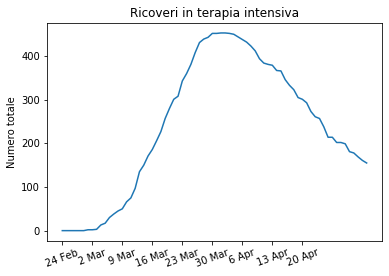

In [13]:
ter_int=data['terapia_intensiva']

#plt.plot(ter_int)
#plt.show()

plt.plot(np.arange(len(ter_int)),ter_int)
plt.xticks(np.arange(0,60,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar','30 Mar','6 Apr','13 Apr','20 Apr','27 Apr','4 Mag','11 Mag','18 Mag'],rotation=20)
plt.ylabel('Numero totale')
plt.title('Ricoveri in terapia intensiva')
plt.savefig('output/ter_int_molise.png',dpi=300)
plt.show()

### confronti regionali (curve)

In [14]:
print('percentuale positivi Molise (ogni 10.000 abitanti)',yinfected[-1]/300000*10000)
print('percentuale positivi Lombardia (ogni 10.000 abitanti)',28124/(10.4*10**6)*10000)

percentuale positivi Molise (ogni 10.000 abitanti) 510.76666666666665
percentuale positivi Lombardia (ogni 10.000 abitanti) 27.04230769230769


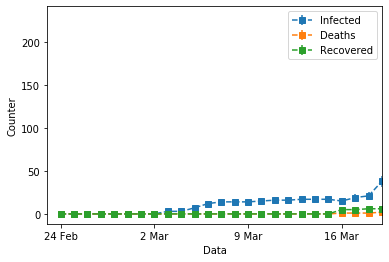

In [15]:
datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
mask = datatot['denominazione_regione']=='Molise'
data =datatot.loc[mask,:]
xdata=pd.to_numeric(range(data.shape[0]))
ydata=data['totale_casi']
ydata_death=data['deceduti']
ydata_rec=data['dimessi_guariti']

yinfected=ydata-ydata_death-ydata_rec

plt.errorbar(xdata,yinfected,np.sqrt(yinfected),linestyle='--',label='Infected',marker='s')
plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='--',label='Deaths',marker='s')
plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='--',label='Recovered',marker='s')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Counter')
plt.xticks(np.arange(0,50,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar'])
plt.xlim(-1,24)
plt.legend()
plt.savefig('Data only_MOLISE.png',dpi=300)
plt.show()

In [16]:
data.iloc[-1]

data                          2020-05-05T17:00:00
stato                                         ITA
codice_regione                                 14
denominazione_regione                      Molise
lat                                       41.5577
long                                      14.6592
ricoverati_con_sintomi                          9
terapia_intensiva                               1
totale_ospedalizzati                           10
isolamento_domiciliare                        167
totale_positivi                               177
variazione_totale_positivi                     -1
nuovi_positivi                                  0
dimessi_guariti                               102
deceduti                                       22
totale_casi                                   301
tamponi                                      7528
casi_testati                                 7252
note_it                                       NaN
note_en                                       NaN


In [ ]:
plt.figure(figsize=(20,15))
for i_nome in range(len(nomiregioni)):
    datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
    mask = datatot['denominazione_regione']==nomiregioni[i_nome]
    data =datatot.loc[mask,:]
    xdata=pd.to_numeric(range(data.shape[0]))
    ydata=data['totale_casi']
    ydata_death=data['deceduti']
    ydata_rec=data['dimessi_guariti']

    yinfected=ydata-ydata_death-ydata_rec
    
    plt.subplot(4,5,i_nome+1)
    plt.errorbar(xdata,yinfected,np.sqrt(yinfected),linestyle='--',label='Infected',marker='s')
    plt.errorbar(xdata,ydata_death,np.sqrt(ydata_death),linestyle='--',label='Deaths',marker='s')
    plt.errorbar(xdata,ydata_rec,np.sqrt(ydata_rec),linestyle='--',label='Recovered',marker='s')
    #plt.yscale('log')
    plt.xlabel('Data')
    plt.ylabel('Counter')
    plt.xticks(np.arange(0,50,7),['24 Feb','2 Mar','9 Mar','16 Mar','23 Mar'])
    plt.xlim(-1,33)
    plt.ylim(1,5*10**4)
    plt.yscale('log')
    plt.legend()
    plt.title(nomiregioni[i_nome])
    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
    plt.savefig('Data only_regioni.png',dpi=300)
plt.show()

KeyboardInterrupt: 

### confronti regionali (istogrammi)

In [2]:
name_regions       = np.array(['Abruzzo','Basilicata','P.A. Bolzano','Calabria','Campania','Emilia-Romagna','Friuli Venezia Giulia','Lazio','Liguria','Lombardia','Marche','Molise','Piemonte','Puglia','Sardegna','Sicilia','Toscana','P.A. Trento','Umbria','Valle d\'Aosta','Veneto'])
#popolation_regions = np.array([1311580, 562869,520891, 1947131, 5801692, 4459477, 1215220, 5879082, 1550640, 10060574, 1525271, 305617, 4356406, 4029053, 1639591, 4999891, 3729641,538223, 882015, 125666, 4905854])

popolation_regions = np.array([1304970, 559084,533050, 1947131, 5801692, 4459477, 1215220, 5879082, 1550640, 10060574, 1525271, 305617, 4356406, 4029053, 1639591, 4999891, 3729641,541380, 882015, 125666, 4905854])

df_regpop=pd.DataFrame(popolation_regions)
df_regpop.index=name_regions 
df_regpop.columns=['popolazione']

df_regpop

,popolazione
Abruzzo,1304970
Basilicata,559084
P.A. Bolzano,533050
Calabria,1947131
Campania,5801692
Emilia-Romagna,4459477
Friuli Venezia Giulia,1215220
Lazio,5879082
Liguria,1550640
Lombardia,10060574


In [3]:
datatot = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
datatot=datatot.iloc[len(datatot)-21:,:]

# costruisco il nuovo dataframe regionale
newtab_regioni=datatot[['totale_casi','dimessi_guariti','deceduti','totale_positivi','tamponi','terapia_intensiva']]
#newtab_regioni['popolazione']=popolation_regions
#newtab_regioni['tamponi']=datatot['tamponi']
newtab_regioni.index=datatot['denominazione_regione']
newtab_regioni=newtab_regioni.join(df_regpop,on=newtab_regioni.index)

# calcolo le grandezze derivate per le regioni
newtab_regioni['inf/pop']=newtab_regioni['totale_positivi']/newtab_regioni['popolazione']*1000
newtab_regioni['tamp/pop']=newtab_regioni['tamponi']/newtab_regioni['popolazione']*1000
newtab_regioni['inf/tamp']=newtab_regioni['totale_positivi']/newtab_regioni['tamponi']*1000

# altre grandezze derivate
newtab_regioni['tot/pop']=newtab_regioni['totale_casi']/newtab_regioni['popolazione']*10000
newtab_regioni['dec/pop']=newtab_regioni['deceduti']/newtab_regioni['popolazione']*10000
newtab_regioni['ter/pop']=round(newtab_regioni['terapia_intensiva']/newtab_regioni['popolazione']*10**5,1)

# normalizzo ai tamponi
maxtamponi=newtab_regioni.loc['Veneto','tamp/pop']
print('tamponi/popolazione massimo ',maxtamponi/1000)
newtab_regioni['inf/pop/tamp']=newtab_regioni['inf/pop']/newtab_regioni['tamp/pop']*maxtamponi

newtab_regioni

tamponi/popolazione massimo  0.13148556805807918


,totale_casi,dimessi_guariti,deceduti,totale_positivi,tamponi,terapia_intensiva,popolazione,inf/pop,tamp/pop,inf/tamp,tot/pop,dec/pop,ter/pop,inf/pop/tamp
denominazione_regione,,,,,,,,,,,,,,
Abruzzo,3237,2063,404,770,73301,3,1304970,0.590052,56.170640,10.504632,24.805168,3.095857,0.2,1.381207
Basilicata,399,339,27,33,28909,0,559084,0.059025,51.707793,1.141513,7.136674,0.482933,0.0,0.150092
P.A. Bolzano,2595,2150,291,154,64105,5,533050,0.288903,120.260764,2.402309,48.682112,5.459150,0.9,0.315869
Calabria,1158,902,97,159,68131,1,1947131,0.081659,34.990455,2.333739,5.947212,0.498169,0.1,0.306853
Campania,4787,3390,411,986,193669,7,5801692,0.169950,33.381469,5.091161,8.251041,0.708414,0.1,0.669414
Emilia-Romagna,27739,20073,4102,3564,316909,76,4459477,0.799197,71.064163,11.246131,62.202361,9.198388,1.7,1.478704
Friuli Venezia Giulia,3267,2611,333,323,130838,2,1215220,0.265795,107.666102,2.468702,26.884021,2.740245,0.2,0.324599
Lazio,7709,3825,721,3163,249267,59,5879082,0.538009,42.398966,12.689205,13.112591,1.226382,1.0,1.668447
Liguria,9619,7173,1452,994,102173,13,1550640,0.641026,65.890858,9.728598,62.032451,9.363876,0.8,1.279170


In [4]:
newtab_regioni.loc['Lombardia','totale_positivi']/newtab_regioni['totale_positivi'].sum()

print(newtab_regioni['inf/pop'].mean())

0.5105853047982394


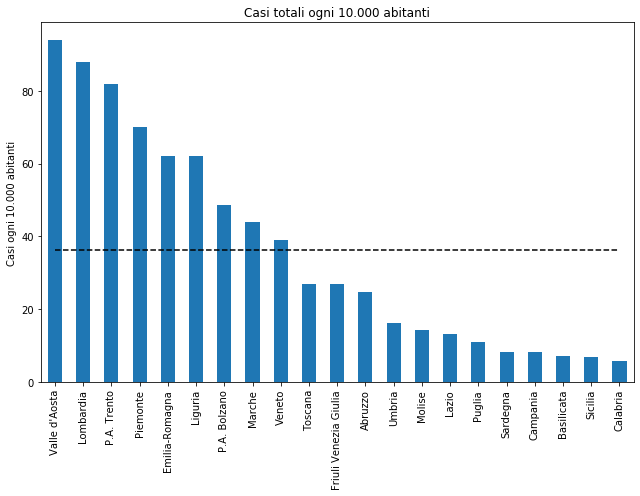

In [5]:
newtab_regioni=newtab_regioni.sort_values(by='tot/pop',ascending=False)

plt.figure(figsize=(9,7))
newtab_regioni['tot/pop'].plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Casi ogni 10.000 abitanti')
plt.xlabel('')
plt.plot(np.arange(0,21),np.zeros(21)+newtab_regioni['tot/pop'].mean(),linestyle='--',color='black',label='Media')
plt.title('Casi totali ogni 10.000 abitanti')
plt.tight_layout()
plt.savefig('output/casiregionale_totpop.png',dpi=300)
plt.show()

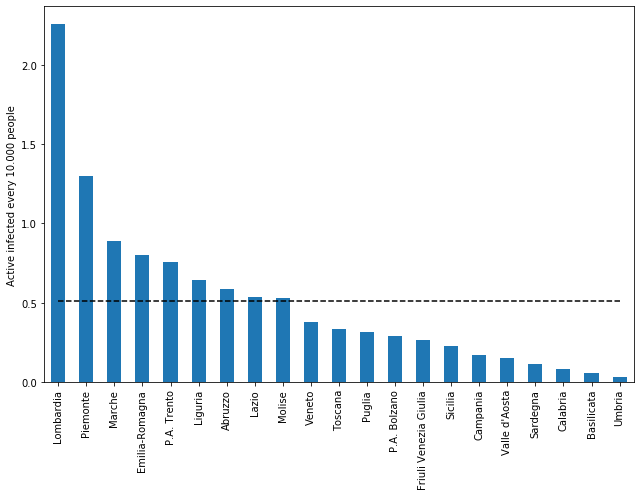

In [6]:
newtab_regioni=newtab_regioni.sort_values(by='inf/pop',ascending=False)

plt.figure(figsize=(9,7))
newtab_regioni['inf/pop'].plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Active infected every 10.000 people')
plt.xlabel('')
plt.plot(np.arange(0,21),np.zeros(21)+newtab_regioni['inf/pop'].mean(),linestyle='--',color='black',label='Media')
plt.tight_layout()
plt.savefig('output/casiregionale_infpop.png',dpi=300)
plt.show()

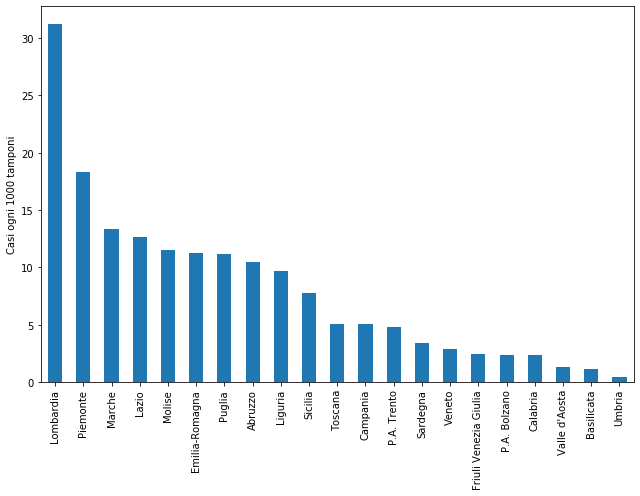

In [7]:
newtab_regioni=newtab_regioni.sort_values(by='inf/tamp',ascending=False)

plt.figure(figsize=(9,7))
newtab_regioni['inf/tamp'].plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Casi ogni 1000 tamponi')
plt.xlabel('')
plt.tight_layout()
plt.savefig('output/casiregionale_inftamp.png',dpi=300)
plt.show()

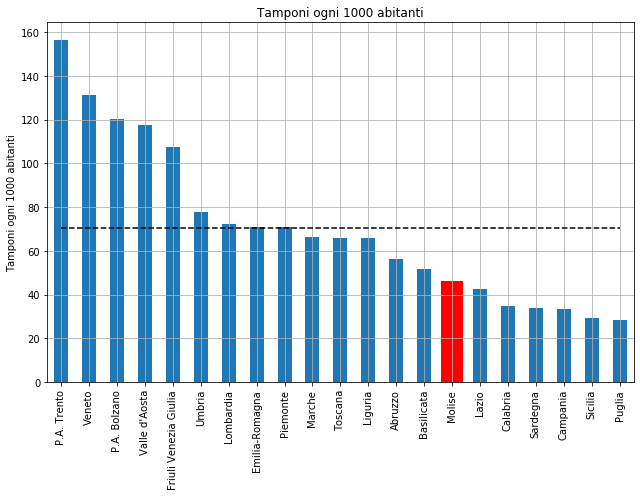

In [9]:
newtab_regioni=newtab_regioni.sort_values(by='tamp/pop',ascending=False)

plt.figure(figsize=(9,7))
newtab_regioni['tamp/pop'].plot(kind='bar')
plt.xticks(rotation=90)
plt.bar(14,newtab_regioni.loc['Molise','tamp/pop'],color='red')
plt.ylabel('Tamponi ogni 1000 abitanti')
plt.xlabel('')
plt.plot(np.arange(0,21),np.zeros(21)+newtab_regioni['tamp/pop'].mean(),linestyle='--',color='black',label='Media')
#plt.legend()
plt.title('Tamponi ogni 1000 abitanti')
plt.tight_layout()
plt.grid()
plt.savefig('output/casiregionale_tamppop.png',dpi=300)
plt.show()

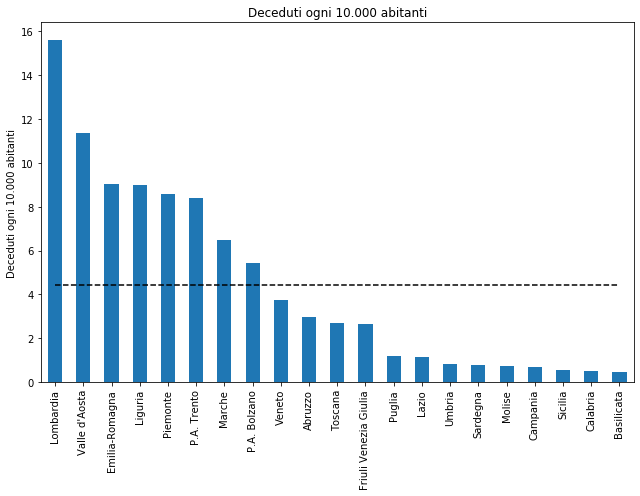

In [7]:
newtab_regioni=newtab_regioni.sort_values(by='dec/pop',ascending=False)

plt.figure(figsize=(9,7))
newtab_regioni['dec/pop'].plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Deceduti ogni 10.000 abitanti')
plt.xlabel('')
plt.title('Deceduti ogni 10.000 abitanti')
plt.plot(np.arange(0,21),np.zeros(21)+newtab_regioni['dec/pop'].mean(),linestyle='--',color='black',label='Media')
#plt.legend()
plt.tight_layout()
plt.savefig('output/casiregionale_decppop.png',dpi=300)
plt.show()

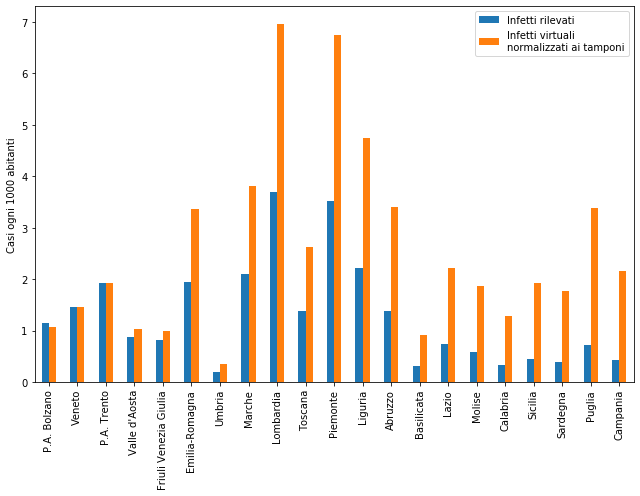

In [11]:
newtab_regioni[['inf/pop','inf/pop/tamp']].plot(kind='bar',figsize=(9,7))
plt.xticks(rotation=90)
plt.ylabel('Casi ogni 1000 abitanti')
plt.xlabel('')
plt.legend(['Infetti rilevati','Infetti virtuali \nnormalizzati ai tamponi'])
plt.tight_layout()
plt.savefig('output/casiregionale_infpoptamp.png',dpi=300)
plt.show()

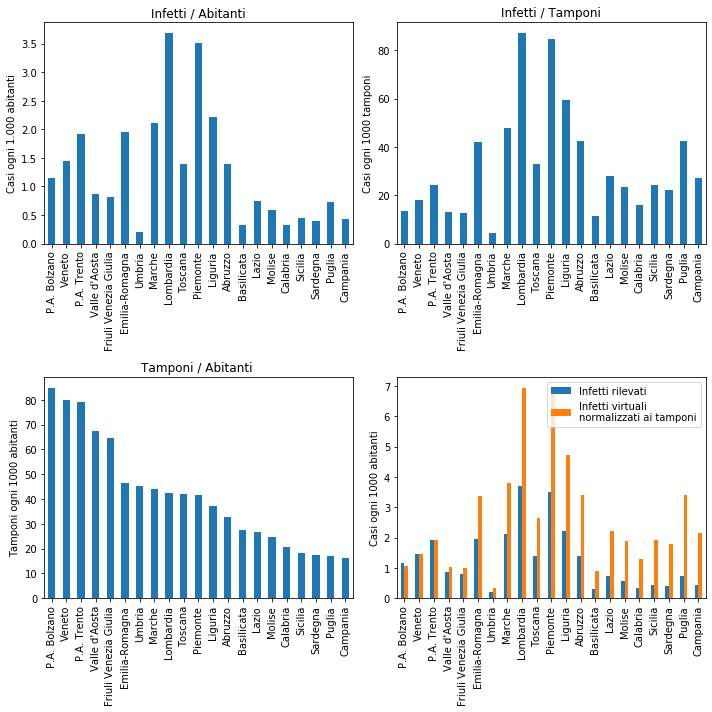

In [12]:
fig, axes = plt.subplots(figsize=(10,10),nrows=2, ncols=2)
ax1=plt.subplot(2,2,1)
newtab_regioni['inf/pop'].plot(kind='bar',ax=ax1)
plt.xticks(rotation=90)
plt.ylabel('Casi ogni 1.000 abitanti')
plt.xlabel('')
plt.title('Infetti / Abitanti')
ax2=plt.subplot(2,2,2)
newtab_regioni['inf/tamp'].plot(kind='bar',ax=ax2)
plt.xticks(rotation=90)
plt.ylabel('Casi ogni 1000 tamponi')
plt.title('Infetti / Tamponi')
plt.xlabel('')
ax3=plt.subplot(2,2,3)
newtab_regioni['tamp/pop'].plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Tamponi ogni 1000 abitanti')
plt.title('Tamponi / Abitanti ')
plt.xlabel('')
ax4=plt.subplot(2,2,4)
newtab_regioni[['inf/pop','inf/pop/tamp']].plot(kind='bar',ax=ax4)
plt.xticks(rotation=90)
plt.ylabel('Casi ogni 1000 abitanti')
plt.xlabel('')
plt.legend(['Infetti rilevati','Infetti virtuali \nnormalizzati ai tamponi'])
plt.tight_layout()
plt.savefig('output/analisitamponi-infetti-popolazione.png',dpi=300)
plt.show()

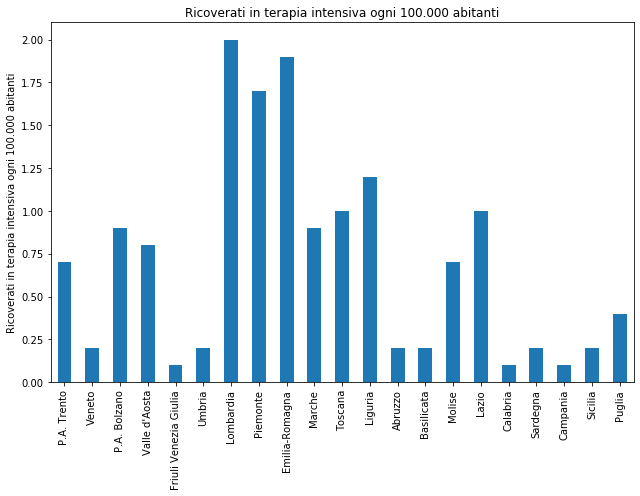

In [7]:
plt.figure(figsize=(9,7))
newtab_regioni['ter/pop'].plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Ricoverati in terapia intensiva ogni 100.000 abitanti')
plt.ylabel('Ricoverati in terapia intensiva ogni 100.000 abitanti')
plt.xlabel('')
plt.tight_layout()
plt.savefig('output/casiregionale_terapia_intensiva.png',dpi=300)
plt.show()

In [ ]:
newtab_regioni.sort_values(by='ter/pop',ascending=False)[['ter/pop','totale_casi','totale_positivi','dimessi_guariti','deceduti']]

### grafici Molise

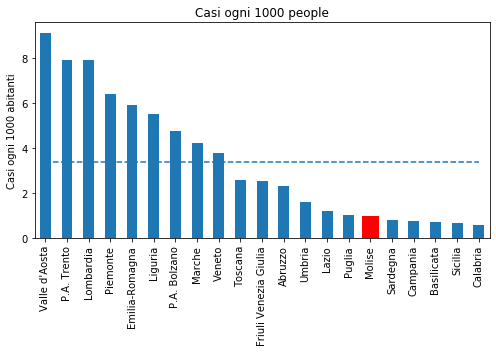

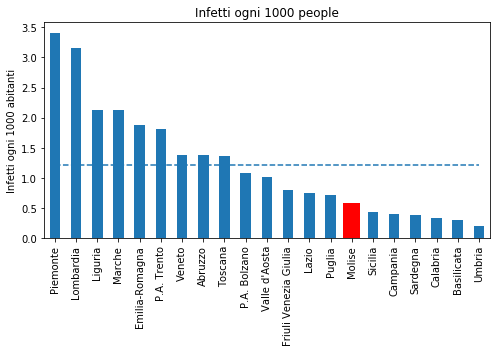

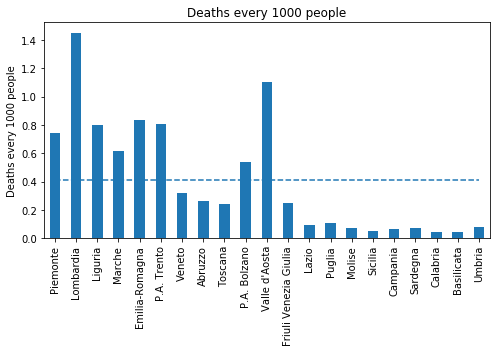

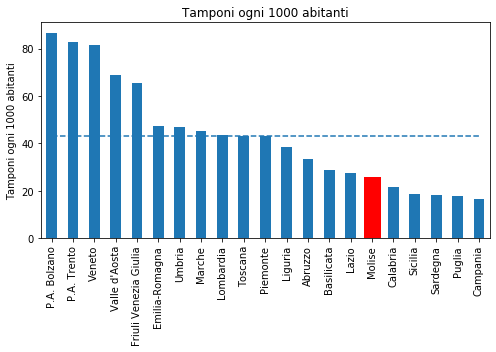

In [8]:
newtab_regioni=newtab_regioni.sort_values(by='tot/pop',ascending=False)
plt.figure(figsize=(7,5))
newtab_regioni['tot/pop'].plot(kind='bar')
plt.bar(15,newtab_regioni.loc['Molise','tot/pop'],color='red')
plt.plot(np.arange(0,21),np.zeros(21)+newtab_regioni['tot/pop'].mean(),linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Casi ogni 1000 abitanti')
plt.xlabel('')
plt.title('Casi ogni 1000 people')
plt.tight_layout()
plt.savefig('output/casiregionale_totpop.png',dpi=300)
plt.show()

newtab_regioni=newtab_regioni.sort_values(by='inf/pop',ascending=False)
plt.figure(figsize=(7,5))
newtab_regioni['inf/pop'].plot(kind='bar')
plt.bar(14,newtab_regioni.loc['Molise','inf/pop'],color='red')
plt.plot(np.arange(0,21),np.zeros(21)+newtab_regioni['inf/pop'].mean(),linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Infetti ogni 1000 abitanti')
plt.xlabel('')
plt.title('Infetti ogni 1000 people')
plt.tight_layout()
plt.savefig('output/casiregionale_infpop.png',dpi=300)
plt.show()

plt.figure(figsize=(7,5))
newtab_regioni['dec/pop'].plot(kind='bar')
#plt.bar(11,newtab_regioni.loc['Molise','dec/pop'],color='red')
plt.plot(np.arange(0,21),np.zeros(21)+newtab_regioni['dec/pop'].mean(),linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Deaths every 1000 people')
plt.xlabel('')
plt.title('Deaths every 1000 people')
plt.tight_layout()
plt.savefig('output/casiregionale_decpop.png',dpi=300)
plt.show()

newtab_regioni=newtab_regioni.sort_values(by='tamp/pop',ascending=False)
plt.figure(figsize=(7,5))
newtab_regioni['tamp/pop'].plot(kind='bar')
plt.bar(15,newtab_regioni.loc['Molise','tamp/pop'],color='red')
plt.plot(np.arange(0,21),np.zeros(21)+newtab_regioni['tamp/pop'].mean(),linestyle='--')
plt.xticks(rotation=90)
plt.ylabel('Tamponi ogni 1000 abitanti')
plt.xlabel('')
plt.title('Tamponi ogni 1000 abitanti')
plt.tight_layout()
plt.savefig('output/casiregionale_tamppop.png',dpi=300)
plt.show()

### comparison between model and data

In [ ]:
fin_result=time_evo(3*10**5,0.1,100,1/14,6.5,t_tresh=1000,I0=13,t=np.arange(0,720))
#fin_result=time_evo(3*10**5,0.15,100,1/14,6.5,t_tresh=1000,I0=3,t=np.arange(0,720))
#fin_result=time_evo(60*10**6,0.41,28,0.0666666,4.88888,t_tresh=17,I0=2,t=np.arange(0,720))

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]
m_vec=fin_result[4]

ydata_inf=ydata-ydata_rec-ydata_death

plt.figure(figsize=(5,5))
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,45)
plt.ylim(1,3*10**2)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_v3.png',dpi=300)
plt.show()

In [ ]:
# percentage variation of the contaminted people, compared to the previous day


# data increment
incremento=[]

ydata=np.array(ydata)
ydata_inf=np.array(ydata_inf)

for i in range(1,len(ydata)):
    incremento.append(ydata_inf[i]/ydata_inf[i-1])
 

# sir increment
incr_SIR=[]

for i in range(len(i_vec)-1):
    incr_SIR.append(i_vec[i+1]/i_vec[i])


# general increment (function)

def incr_SIR_fun(N,beta0,beta1,gamma,death_rate,t_tresh=15,I0=0.0065,t=np.arange(0,720)):
    fin_result=time_evo(N,beta0,beta1,gamma,death_rate,t_tresh,I0,t=np.arange(0,720))
    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]
    
    incr_SIR=[]
    
    for i in range(len(i_vec)-1):
        incr_SIR.append(i_vec[i+1]/i_vec[i])
        
    return np.array(incr_SIR)

# upper and lower limits

beta1h=25
beta1l=15

incr_SIR_high=incr_SIR_fun(3*10**5,0.15,100,1/14,6.5,t_tresh=1000,I0=3)
incr_SIR_low=incr_SIR_fun(3*10**5,0.1,100,1/14,6.5,t_tresh=1000,I0=13)

    
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,43,1/14,5))
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,13,1/14,5))
plt.fill_between(t[1:],incr_SIR_high,incr_SIR_low,color='orange',alpha=0.2)
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,40)
plt.ylim(0.9,1.5)
plt.legend()
plt.savefig('first_derivative_SIR_band_v3.png',dpi=300)
plt.show()

In [ ]:
# upper curve

fin_result_high=time_evo(3*10**5,0.15,100,1/14,6.5,t_tresh=1000,I0=3,t=np.arange(0,720))

t_high=fin_result_high[0]
s_vec_high=fin_result_high[1]
i_vec_high=fin_result_high[2]
r_vec_high=fin_result_high[3]
m_vec_high=fin_result_high[4]


# lower curve

fin_result_low=time_evo(3*10**5,0.1,100,1/14,6.5,t_tresh=1000,I0=13,t=np.arange(0,720))

t_low=fin_result_low[0]
s_vec_low=fin_result_low[1]
i_vec_low=fin_result_low[2]
r_vec_low=fin_result_low[3]
m_vec_low=fin_result_low[4]

## predictions (best fit)

In [ ]:
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlim(0,180)
plt.ylim(1,0.2*10**7)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('sirdatacomp_prediction_v3.png',dpi=300)
plt.show()

In [ ]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,40)
plt.ylim(1,10**2)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
plt.step(t[1:],incr_SIR,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(10,40)
plt.ylim(1,2.5)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata_inf),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.plot(t, i_vec/3, 'r--', label='Infected/3')
plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--', label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,10**4)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('combined_SIR_v3.png',dpi=300)
plt.show()

In [ ]:
print('Total deaths ',int(m_vec[-1]))
print('Total infected ',int(m_vec[-1]+r_vec[-1]))
print('Maximum infected ',int(i_vec.max()/3))
print('Maximum infected (hospitalized)',int(i_vec.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec.max()/3*10/100))

In [ ]:
modello_check=i_vec[17:17+len(ydata)]/3
data_check=ydata_inf

accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)

print('The accuracy of the model on past data is ',accuracy,'%')

In [ ]:
print(np.array((data_check-modello_check)/data_check*100))

In [ ]:
modello_death_check=m_vec[17:17+len(ydata)]
data_death_check=ydata_death

accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

print('accuracy on deaths',accuracy_death,'%')

In [ ]:
#export
export = pd.DataFrame({'t':t, 's':s_vec, 'i': i_vec, 'r': r_vec, 'm':m_vec})
export.to_csv('export.csv',index=False)

In [ ]:
def minimizer_1var(beta1):
    
    fin_result=time_evo(60*10**6,0.415,beta1,1/14,6,t_tresh=17,I0=2,t=np.arange(0,720))

    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check=i_vec[17:17+len(ydata)]/3
    data_check=ydata_inf
    
    accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17:17+len(ydata)]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

    return accuracy

minimizer_1var_vec=np.vectorize(minimizer_1var)

In [ ]:
beta1grid=np.arange(25,30,0.1)
beta1y=minimizer_1var_vec(beta1grid)

plt.plot(beta1grid,beta1y)
plt.show()

## automatic minimization

In [ ]:
def minimizer(x):
    
    beta0,beta1,gamma,death_rate=x
    
    fin_result=time_evo(60*10**6,beta0,beta1,gamma,death_rate,t_tresh=17,I0=2,t=np.arange(0,720))

    t=fin_result[0]
    s_vec=fin_result[1]
    i_vec=fin_result[2]
    r_vec=fin_result[3]
    m_vec=fin_result[4]

    #compute the error on infected 
    modello_check=i_vec[17:17+len(ydata)]/3
    data_check=(ydata-ydata_rec)
    accuracy=round(np.mean(np.abs((data_check-modello_check))/data_check)*100,2)
    
    #compute the error on deaths
    modello_death_check=m_vec[17:17+len(ydata)]
    data_death_check=ydata_death
    accuracy_death=round(np.mean(np.abs((data_death_check-modello_death_check))/data_death_check)*100,2)

    return (accuracy+accuracy_death)/2


minimizer_vec=np.vectorize(minimizer)

In [ ]:
minimizer([0.415,28.5,1/14,4.8])

In [ ]:
initial_guess=[0.415,27,1/14,5]

from scipy.optimize import minimize

res=minimize(minimizer,initial_guess)

res.x

In [ ]:
# brute force (not efficient)

b0_grid=np.linspace(0.41,0.42,10)
b1_grid=np.linspace(27,28,10)
gamma_grid=np.linspace(0.06,0.09,10)
death_rate_grid=np.linspace(4,6,10)

minimo_tab=[]

#for i in b0_grid:
#    print(i)
#    for j in b1_grid:
#        for k in gamma_grid:
#            for l in death_rate_grid:
#                minimo_tab.append([i,j,k,l,minimizer([i,j,k,l])])

In [ ]:
#minimo_tab_arr=np.array(minimo_tab)

#position=minimo_tab_arr[:,4].argmin()
#minimo_tab_arr[position]

## predictions with uncertaintites

In [ ]:
### combined plot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.errorbar(xdata+17,ydata-ydata_rec,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s',label='Infected')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s',label='Deaths')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s',label='Recovered with immunity')
plt.plot(t, s_vec, 'b--')
plt.plot(t, i_vec/3, 'r--',label='Infected/3 (model)')
#plt.plot(t, r_vec, 'g--', label='Recovered with immunity')
plt.plot(t, m_vec, 'k--',label='Deaths (model)')
plt.yscale('log')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,40)
plt.ylim(1,100)
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.subplot(1,3,2)
plt.step(xdata[xdata>=1]+17,incremento,label='Data')
#plt.step(t[1:],incr_SIR,label='Model')
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,43,1/14,5))
#plt.step(t[1:],incr_SIR_fun(60*10**6,0.415,13,1/14,5))
plt.fill_between(t[1:],incr_SIR_high,incr_SIR_low,color='orange',alpha=0.5,label='Model')
plt.xlabel('Data')
plt.ylabel('Variation')
plt.xticks(np.arange(14,50,7),['21 Feb','28 Feb','6 Mar','13 Mar','20 Mar'])
plt.xlim(17,40)
plt.ylim(0.9,1.7)
plt.legend()
plt.subplot(1,3,3)
plt.errorbar(xdata+17,ydata_inf,np.sqrt(ydata-ydata_rec),color='red',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_death,np.sqrt(ydata_death),color='black',linestyle='None',marker='s')
plt.errorbar(xdata+17,ydata_rec,np.sqrt(ydata_rec),color='green',linestyle='None',marker='s')
#plt.plot(t, s_vec, 'b--', label='Susceptible')
plt.fill_between(t, i_vec_high/3,i_vec_low/3, label='Infected/3',color='red',alpha=0.5)
plt.fill_between(t, r_vec_high,r_vec_low, color='green',alpha=0.5, label='Recovered with immunity')
plt.fill_between(t, m_vec_high,m_vec_low,color='black',alpha=0.5, label='Deaths')
plt.yscale('log')
plt.xlim(0,180)
plt.ylim(1,10**3)
plt.xticks(np.arange(14+9,210,30),['Mar','Apr','May','Jun','Jul','Aug','Sep'])
plt.xlabel('Data')
plt.ylabel('Counter')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('combined_SIR_band_v3_molise.png',dpi=300)
plt.show()

In [ ]:
print('Total deaths ',int(m_vec_low[-1]),'-',int(m_vec_high[-1]))
print('Total infected ',int(m_vec_low[-1]+r_vec_low[-1]),'-',int(m_vec_high[-1]+r_vec_high[-1]))
print('Maximum infected (detected) ',int(i_vec_low.max()/3),'-',int(i_vec_high.max()/3))
print('Maximum infected (hospitalized)',int(i_vec_low.max()/3*20/100),'-',int(i_vec_high.max()/3*20/100))
print('Maximum infected (intensive care)',int(i_vec_low.max()/3*10/100),'-',int(i_vec_high.max()/3*10/100))

In [ ]:
23000/(6*10**7)*100

In [ ]:
15/(300000)*100